In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D, InputLayer, Dense, Resizing,Rescaling,Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical

In [2]:
(xtrain,ytrain),(xtest, ytest)=keras.datasets.mnist.load_data()

In [3]:
xtrain.shape


(60000, 28, 28)

In [4]:
len(xtrain)

60000

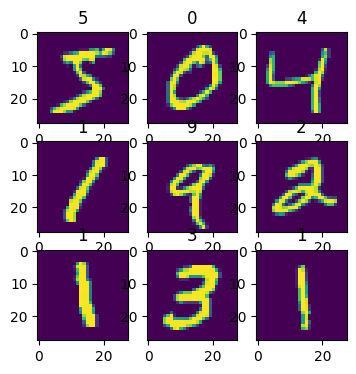

In [5]:
plt.figure(figsize=(4,4))
for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(xtrain[i])
   plt.title(ytrain[i])

In [6]:
xtrain = tf.image.grayscale_to_rgb(tf.expand_dims(xtrain, axis=-1))
xtest  = tf.image.grayscale_to_rgb(tf.expand_dims(xtest, axis=-1))

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
xtrain.shape

TensorShape([60000, 28, 28, 3])

In [7]:
model=tf.keras.Sequential([
InputLayer(input_shape=(None,None,3)),
Resizing(28,28),
Rescaling (1/255),

Conv2D(filters=32,kernel_size=(3,3), activation="relu"),
BatchNormalization(),
MaxPooling2D(pool_size=(2,2)),

Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
BatchNormalization(),
MaxPooling2D(pool_size=(2,2)),

Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
BatchNormalization(),
MaxPooling2D(pool_size=(2,2)),

Flatten(),
Dense(100, activation="relu"),
Dense(40, activation="relu"),
Dense(10, activation="softmax")
])

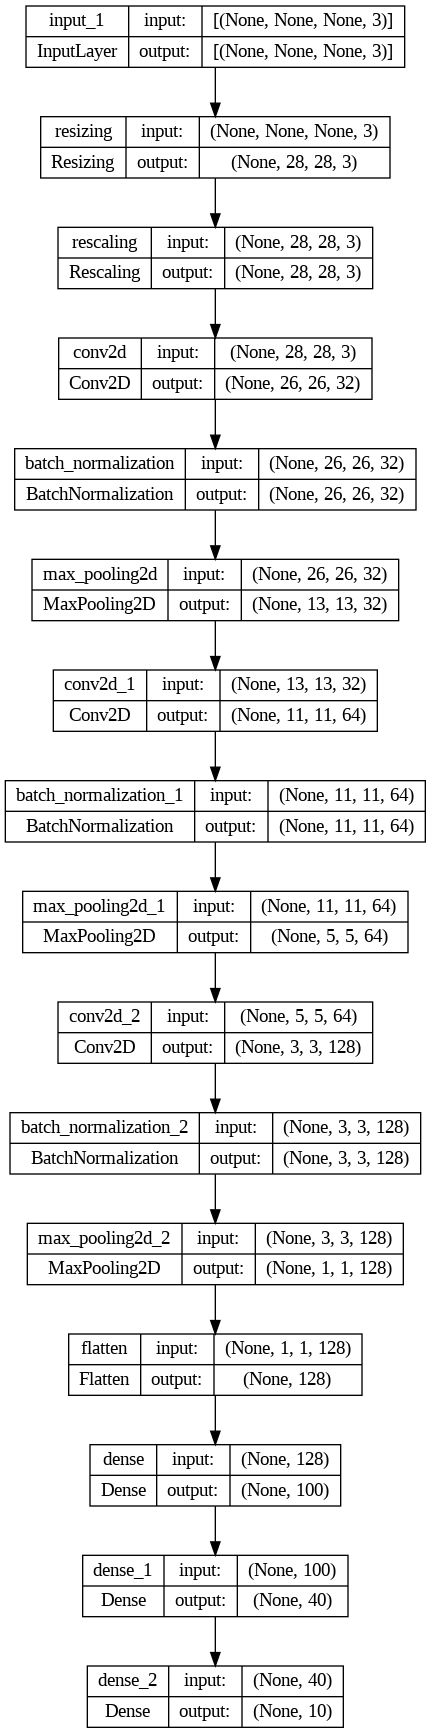

In [8]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [9]:
model.compile(optimizer=Adam(),
loss=BinaryCrossentropy(),
metrics="accuracy")

In [10]:
model.fit(xtrain,ytrain, epochs=5)

Epoch 1/5
 202/1875 [==>...........................] - ETA: 1:09 - loss: 0.0951 - accuracy: 0.8521

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 5s 14ms/step - loss: 0.0080 - accuracy: 0.9889


[0.007956924848258495, 0.9889000058174133]

In [ ]:

xtrain.shape

313/313 [==============================] - 4s 14ms/step


TensorShape([60000, 28, 28, 3])

In [ ]:

Output=[]
for i in range(9):
   a=model.predict(tf.expand_dims(xtest[i], axis=0))
   Output.append(np.argmax(a))
Output

1/1 [==============================] - 0s 19ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 5]

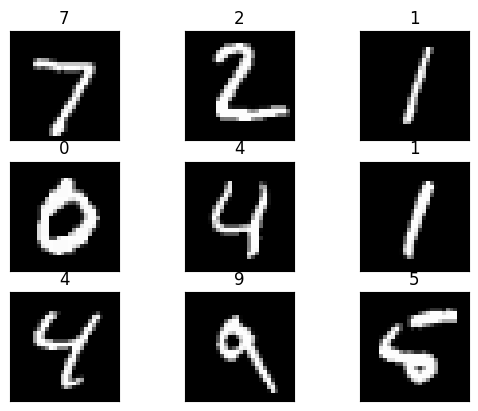

In [ ]:
#plt.figure(figsize=(5,5))
for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(xtest[i])
   plt.title(Output[i])
   plt.xticks([])
   plt.yticks([])

So finally we are done with our project